In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
247,6.25,49.0,0
320,7.18,51.0,1
470,6.46,28.0,0
976,6.96,48.0,0
878,6.98,34.0,0


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

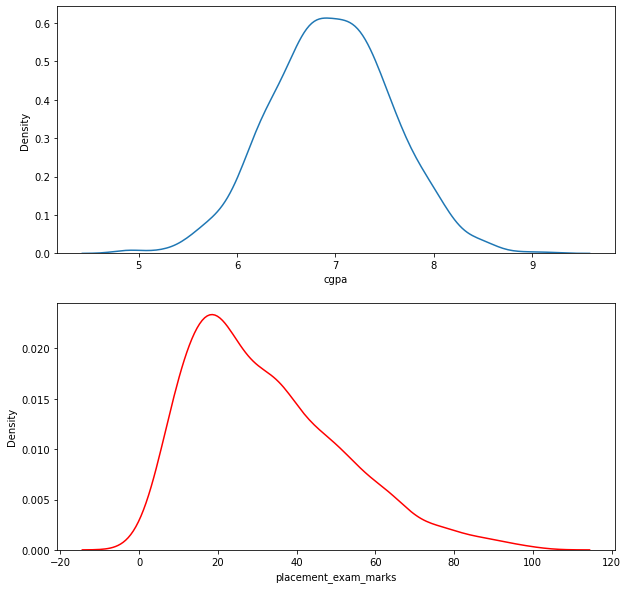

In [4]:
fig , ax = plt.subplots(2 , figsize = (10,10))


sns.kdeplot(df['cgpa'] , ax = ax[0] )
sns.kdeplot(df['placement_exam_marks'] , ax = ax[1] , color = 'red')


In [7]:
df['placement_exam_marks'].skew() , df['cgpa'].skew()

(0.8356419499466834, -0.014529938929314918)

In [8]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot:xlabel='placement_exam_marks'>

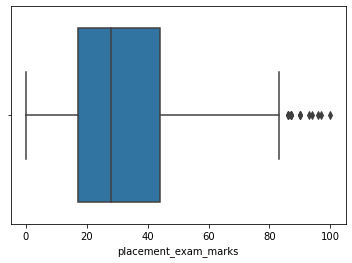

In [11]:
sns.boxplot(x = df['placement_exam_marks'])

In [13]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [14]:
percentile25,percentile75

(17.0, 44.0)

In [15]:
iqr = percentile75 - percentile25

In [16]:
iqr

27.0

In [17]:
upper_limit = percentile75 + 1.5 *iqr
lower_limit = percentile25 -  1.5 *iqr

In [20]:
print("Upper Limit :",upper_limit)
print("Lower Limit :",lower_limit)

Upper Limit : 84.5
Lower Limit : -23.5


In [26]:
df[df['placement_exam_marks']> upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [27]:
df[df['placement_exam_marks']< lower_limit]

,cgpa,placement_exam_marks,placed


# Trimming

In [28]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [29]:
new_df.shape

(985, 3)

<AxesSubplot:xlabel='placement_exam_marks'>

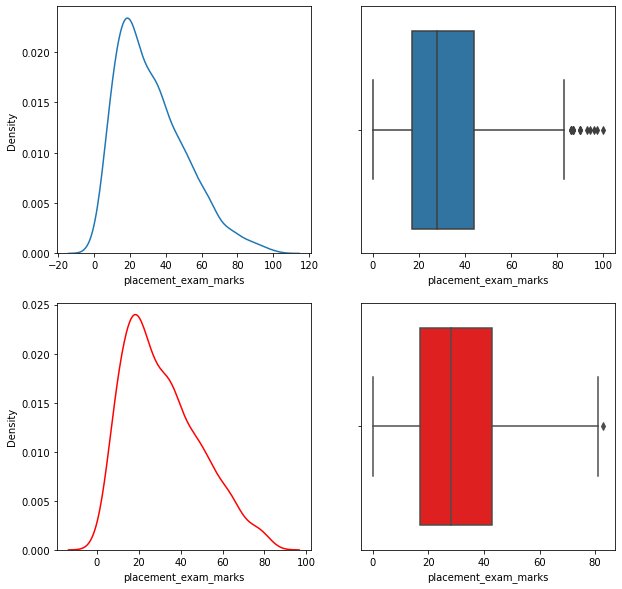

In [38]:
fig , ax = plt.subplots(2,2 , figsize = (10,10))


sns.kdeplot(x =df['placement_exam_marks'] , ax = ax[0,0] )
sns.boxplot(x = df['placement_exam_marks'] , ax = ax[0,1])

sns.kdeplot(x = new_df['placement_exam_marks'] , ax = ax[1,0] , color = 'red')
sns.boxplot(x = new_df['placement_exam_marks'] , ax = ax[1,1] ,color = 'red')

# Capping

In [42]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(new_df_cap['placement_exam_marks'] > upper_limit ,
                                             upper_limit , np.where(df['placement_exam_marks']<lower_limit,
                                                                   lower_limit , new_df_cap['placement_exam_marks']))

<AxesSubplot:xlabel='placement_exam_marks'>

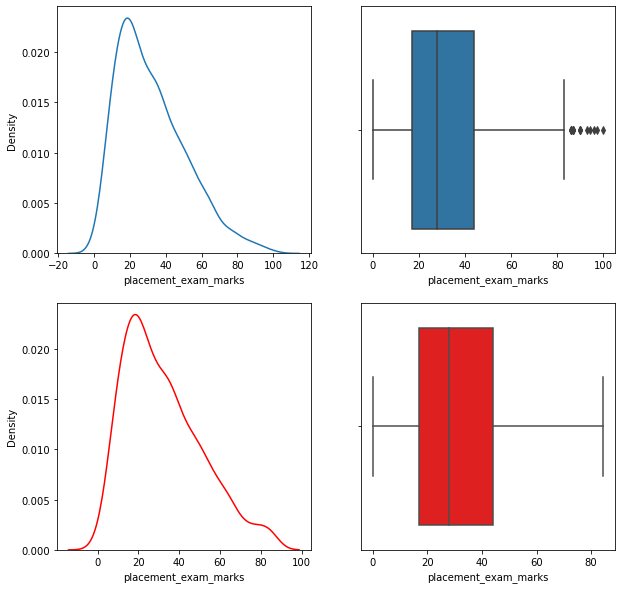

In [43]:
fig , ax = plt.subplots(2,2 , figsize = (10,10))


sns.kdeplot(x =df['placement_exam_marks'] , ax = ax[0,0] )
sns.boxplot(x = df['placement_exam_marks'] , ax = ax[0,1])

sns.kdeplot(x = new_df_cap['placement_exam_marks'] , ax = ax[1,0] , color = 'red')
sns.boxplot(x = new_df_cap['placement_exam_marks'] , ax = ax[1,1] ,color = 'red')